In [1]:
import pandas as pd
import numpy as np
from sys import argv
import re
import random
import pprint
from scipy import linalg
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Node(object):
    def __init__(self, name):
        self.name = name
        self.losses = {} #Key = other team, value = sum margin of losses (Goal differential)

    def add_loss(self, oppTeam, pointDiff):
        # Either adds a new loss, or updates the overall pointDiff
        self.losses[oppTeam] = self.losses.get(oppTeam, 0) + pointDiff

In [3]:
def create_nodes(dataframe):
    """
    Reads input file and creates nodes. Check that indicies align with data; 
    filename is read in as an argument from terminal (see main() function)
    
    INPUT: my_file - raw csv data of games
    
    OUTPUT: games - array of games in format games[i] = [loser, winner, pointDiff]
    
    """
   
    # Read data into a df
    df = dataframe.copy()
    df = df.astype({"GF": int, "GA": int})
  

    games = []

    for index, row in df.iterrows():

        if int(row['GF']) < int(row['GA']):
            loser = row['Home']
            winner = row['Away']
            pointDiff = row['GA'] - row['GF']
        
        else:
            loser = row['Away']
            winner = row['Home']
            pointDiff = row['GA'] - row['GF']
        
        games.append([loser, winner, pointDiff])
    
    return games

In [4]:
df = pd.read_csv('scores+fixtures.csv')
df = df.astype({"GF": int, "GA": int})
df.tail()

,Round,Wk,Day,Date,Time,Home,xG,Score,GF,GA,...,PenA,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes,Referee.1,Match Report.1
46,Quarter-finals,NaN,Sat,03/07/2021,20:00 (17:00),Czech Republic,1.2,1–2,1,2,...,NaN,1.2,Denmark,"16,306",Bakı Olimpiya Stadionu,Björn Kuipers,Match Report,NaN,NaN,NaN
47,Quarter-finals,NaN,Sat,03/07/2021,21:00 (20:00),Ukraine,0.3,0–4,0,4,...,NaN,1.3,England,"11,880",Stadio Olimpico,Felix Brych,Match Report,NaN,NaN,NaN
48,Semi-finals,NaN,Tue,06/07/2021,20:00,Italy,0.4,(4) 1–1 (2),1,1,...,2.0,1.7,Spain,"57,811",Wembley Stadium,Felix Brych,Match Report,Italy won on penalty kicks following extra time,NaN,NaN
49,Semi-finals,NaN,Wed,07/07/2021,20:00,England,2.6,2–1,2,1,...,NaN,0.3,Denmark,"64,950",Wembley Stadium,Danny Makkelie,Match Report,Required Extra Time,NaN,NaN
50,Final,NaN,Sun,11/07/2021,20:00,Italy,2.1,(3) 1–1 (2),1,1,...,2.0,0.4,England,"67,173",Wembley Stadium,Björn Kuipers,Match Report,NaN,NaN,NaN


In [5]:


game_nodes = create_nodes(df.loc[:49,:])


In [6]:
# Create graph G from a dataframe of our matrix
G = nx.from_pandas_edgelist(df=pd.DataFrame(
    game_nodes, columns=['Loser', 'Winner', 'Weight']),
                            source='Loser',
                            target='Winner',
                            edge_attr='Weight',
                           )

In [7]:
teams = nx.pagerank(G, alpha=0.15)
dict(sorted(teams.items(), key=lambda item: item[1], reverse=True))

{'Spain': 0.04491637150065104,
 'Denmark': 0.04461238273111978,
 'England': 0.04417110904947916,
 'Italy': 0.04416768290201823,
 'Ukraine': 0.043190033772786456,
 'Belgium': 0.043187378580729165,
 'Switzerland': 0.04271252758789062,
 'Czech Republic': 0.04269400036621093,
 'Portugal': 0.04184945483398437,
 'Sweden': 0.04184675764973958,
 'France': 0.04183571215820312,
 'Germany': 0.04166501985677083,
 'Netherlands': 0.041535438354492187,
 'Austria': 0.04136519673665365,
 'Croatia': 0.040891418945312494,
 'Wales': 0.040884293212890624,
 'Hungary': 0.04011731852213541,
 'Poland': 0.040114577148437504,
 'Slovakia': 0.040114577148437504,
 'North Macedonia': 0.039821147867838545,
 'Russia': 0.03981852880859375,
 'Finland': 0.039818528808593746,
 'Turkey': 0.03933537255859375,
 'Scotland': 0.039335170898437494}

In [8]:
df[['Home','Away', 'GF', 'GA']].tail(1)

,Home,Away,GF,GA
50,Italy,England,1,1


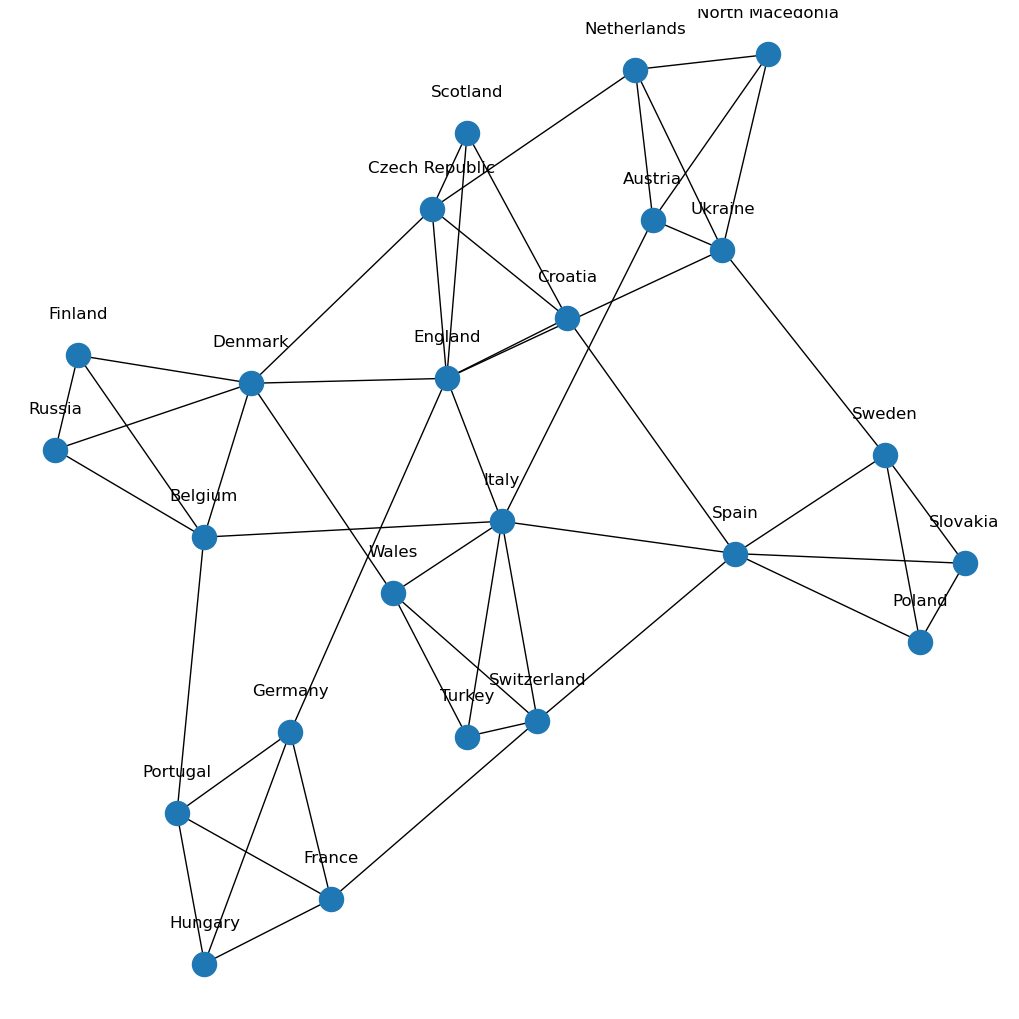

In [9]:
 #Create nodes
game_nodes_ = create_nodes(df)

# Create graph G from a dataframe of our matrix
G_final = nx.from_pandas_edgelist(df=pd.DataFrame(
    game_nodes_, columns=['Loser', 'Winner', 'Weight']),
                            source='Loser',
                            target='Winner',
                            edge_attr='Weight',
                           )

# Plot Graph

plt.figure(figsize=(10,10), dpi=100)
pos = nx.spring_layout(G_final)
nx.draw(G_final, pos, font_size=18, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07

nx.draw_networkx_labels(G_final, pos)

plt.show()